In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#需要翻墙，速度快

11493376/11490434 [==============================] - 11s 1us/step


In [6]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


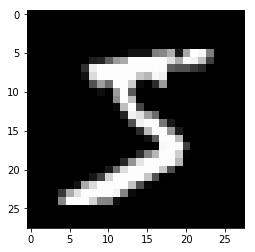

In [8]:
import matplotlib.pyplot as plt
im=plt.imshow(x_train[0],cmap='gray')
plt.show()

In [9]:
y_train[0]#数据集的第一张图片

5

In [11]:
#多层感知机并没有直接识别一个图片二维数组的能力，因此需要把他摊平处理
#让他每一张图片都变成一维数组，张数是不变的
x_train=x_train.reshape(60000,28*28)#一维向量摊平处理
x_test=x_test.reshape(10000,28*28)

In [12]:
print(x_train.shape)

(60000, 784)


In [13]:
#先看看这张图的原始数据情况吧
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
#在处理网络的时候，我们需要进行数据归一化，因为这样庞大的数据计算机不一定能处理得很准确，收敛太慢
#也便于处理 Bad Data

x_train=x_train/255  #简单地处理处理，毕竟RGB最大为255
x_test=x_test/255


In [15]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
#对分类结果orLabel进行独热编码
#[0,0,0,0,0,1,0,0,0,0]表示 ”5“
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 到这里，我们完成了数据处理

In [18]:
model=Sequential()
#隐藏层的神经元越来越小
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))#10个输出

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 这是一个网上找的简单的原理图分析

<img src="imgs/mnist_theory.png">

In [25]:
model.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.7573 - acc: 0.8218 - val_loss: 0.3661 - val_acc: 0.9026
Epoch 2/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.3375 - acc: 0.9058 - val_loss: 0.2883 - val_acc: 0.9196
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.2810 - acc: 0.9206 - val_loss: 0.2563 - val_acc: 0.9288
Epoch 4/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.2480 - acc: 0.9300 - val_loss: 0.2276 - val_acc: 0.9345
Epoch 5/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.2230 - acc: 0.9370 - val_loss: 0.2071 - val_acc: 0.9407


In [27]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 61us/step


In [28]:
print("LOSS:",score[0])
print("ACCURACY:",score[1])

LOSS: 0.20707024672180413
ACCURACY: 0.9407
